# Single Model Training

This notebook is to enable model training for a single model using the specified parameters in config.yaml.


In [15]:
# Import required libraries
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", "..", "..", "..",))
sys.path.append(project_root)
from src.pipelines.xgboost.train_single_model import main

## 1. Run Model

In [16]:
# Now you can import from core if needed
from src.core.clients.bigquery import BigQueryClient
from src.core.config_loader import ConfigLoader

bq_client = BigQueryClient()
config_loader = ConfigLoader()

sales_query = f"""
    SELECT 
    *  
    FROM `porygon-pipelines.walmart_training_tables.walmart_master_table` tgt
    WHERE 
        tgt.ctx_store_id = 'CA_1'
        AND is_stockout_tgt = 0
        AND fea_item_longevity_months >=0
"""


# Extract data
df = bq_client.load_from_query(sales_query)


INFO:src.core.clients.bigquery:BigQuery client initialized for project: porygon-pipelines
/Users/anapreciado/Desktop/porygon-demand-forecasting/venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
INFO:src.core.clients.bigquery:Loaded 110992 rows from custom query.


In [17]:
df[["fea_item_longevity_months", "is_stockout_tgt"]].drop_duplicates()

,fea_item_longevity_months,is_stockout_tgt
0,0,0
950,35,0
951,33,0
953,34,0
956,4,0
...,...,...
17947,51,0
17972,54,0
17973,50,0
18006,55,0


In [18]:
features = [
    c for c in 
    df if "fea_" in c
]
trained_model = main(features = features)

INFO:src.pipelines.xgboost.train_single_model:
        XGBoost Model Training Pipeline is starting...
        
INFO:src.core.clients.bigquery:BigQuery client initialized for project: porygon-pipelines
/Users/anapreciado/Desktop/porygon-demand-forecasting/venv/lib/python3.13/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
INFO:src.core.clients.bigquery:Loaded 110992 rows from table: walmart_master_table
INFO:src.pipelines.xgboost.train_single_model:Filtering outliers ...
INFO:src.pipelines.xgboost.train_single_model:Training model...
INFO:src.core.models.xgboost:
            Training XGBoost Model...
            


[0]	validation_0-rmse:0.73538	validation_1-rmse:0.71358
[1]	validation_0-rmse:0.57408	validation_1-rmse:0.55764
[2]	validation_0-rmse:0.47331	validation_1-rmse:0.46135
[3]	validation_0-rmse:0.41311	validation_1-rmse:0.40499
[4]	validation_0-rmse:0.37853	validation_1-rmse:0.37304
[5]	validation_0-rmse:0.35902	validation_1-rmse:0.35561
[6]	validation_0-rmse:0.34758	validation_1-rmse:0.34585
[7]	validation_0-rmse:0.34052	validation_1-rmse:0.34104
[8]	validation_0-rmse:0.33594	validation_1-rmse:0.33927
[9]	validation_0-rmse:0.33306	validation_1-rmse:0.33814
[10]	validation_0-rmse:0.33058	validation_1-rmse:0.33792
[11]	validation_0-rmse:0.32875	validation_1-rmse:0.33744
[12]	validation_0-rmse:0.32728	validation_1-rmse:0.33753
[13]	validation_0-rmse:0.32597	validation_1-rmse:0.33730
[14]	validation_0-rmse:0.32480	validation_1-rmse:0.33899
[15]	validation_0-rmse:0.32374	validation_1-rmse:0.33859
[16]	validation_0-rmse:0.32252	validation_1-rmse:0.33861
[17]	validation_0-rmse:0.32142	validation

INFO:src.core.models.xgboost:Model saved to /Users/anapreciado/Desktop/porygon-demand-forecasting/src/artifacts/models/xgboost/20260126_135619/model_0.pickle
INFO:src.core.models.xgboost:
            Model Training Pipeline completed successfully!
            Run ID: /Users/anapreciado/Desktop/porygon-demand-forecasting/src/artifacts/models/xgboost/20260126_135619
            Artifacts saved to: /Users/anapreciado/Desktop/porygon-demand-forecasting/src/artifacts/models/xgboost/20260126_135619
            


## 2. Compare metrics with Benchmark

1. Compare Metrics (MdAPE, MdAE) with benchmark in total and accross validation sets of interest

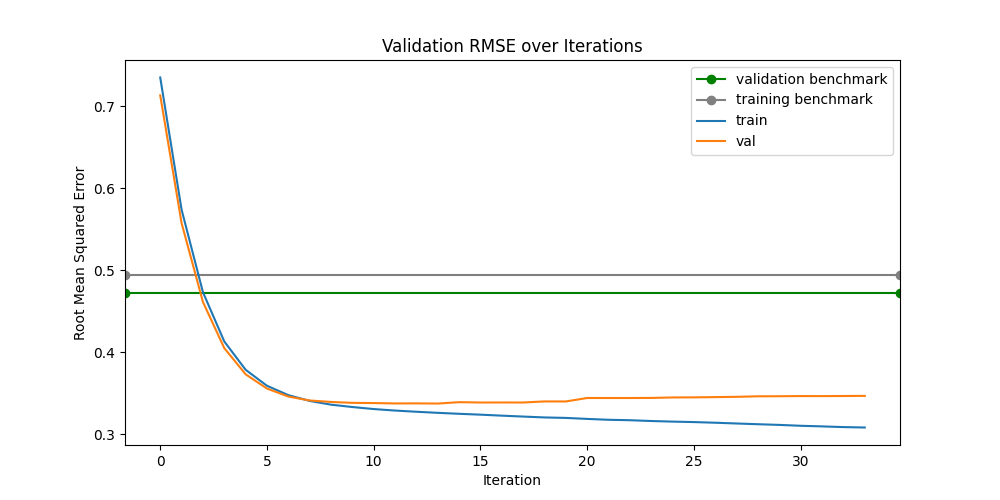

In [19]:
from IPython.display import Image, display
display(Image(trained_model.plot_bias_variance_tradeoff_path))

## 6. Evaluate Residuals

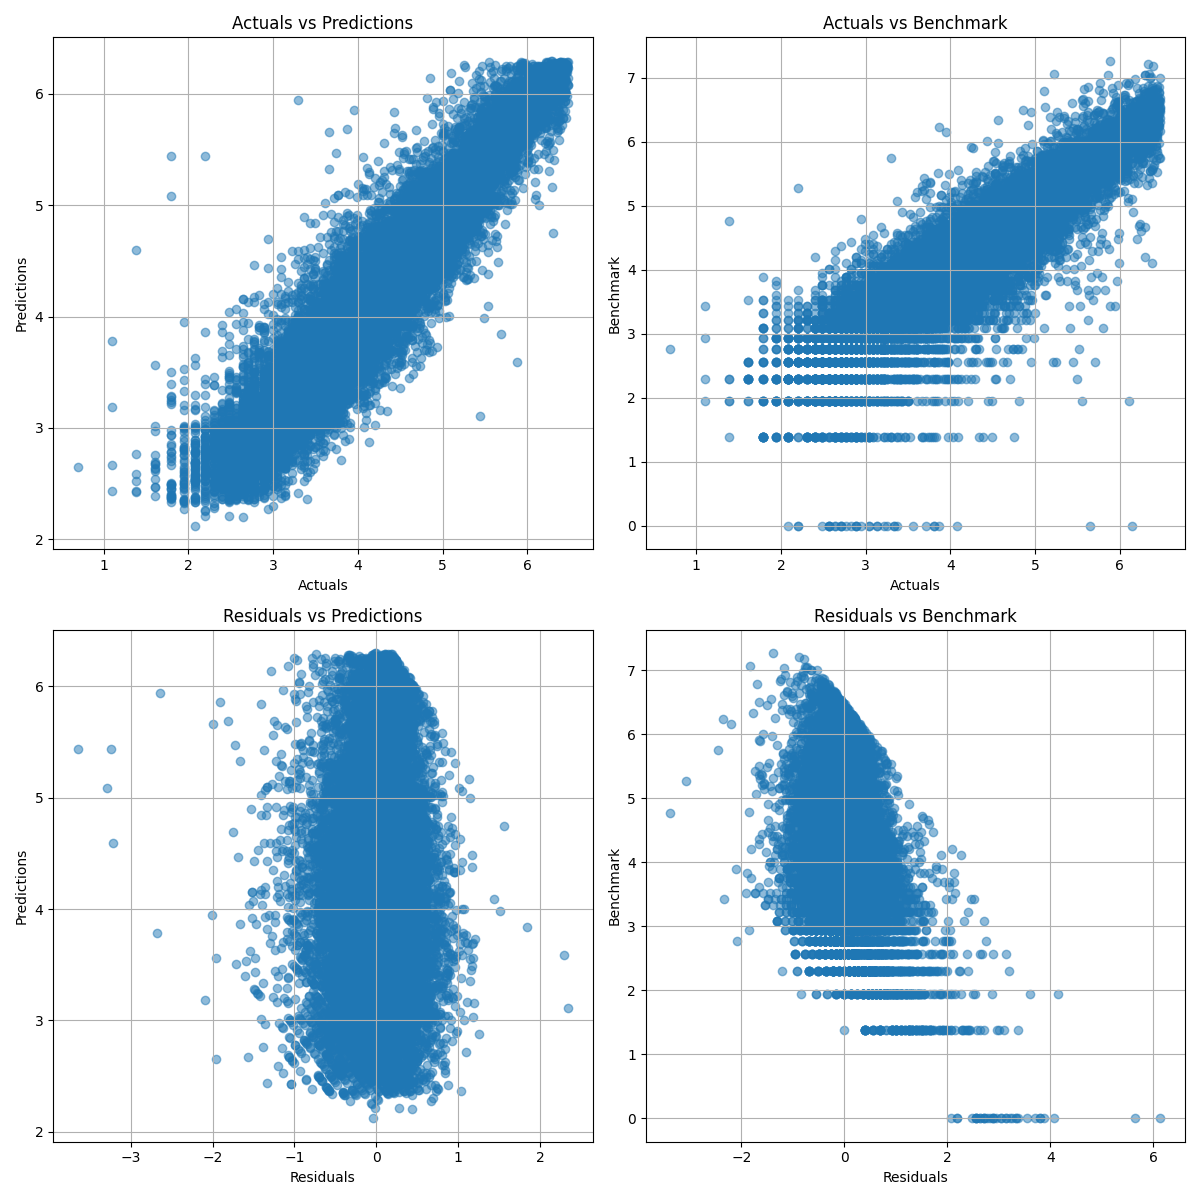

In [20]:
from IPython.display import Image, display
display(Image(trained_model.plot_residuals_paths))

## 8. Feature Importance

In [21]:
trained_model.feature_importance.head(20)

,feature,importance
116,fea_item_monthly_sales_roll_avg_12_months,78.0
63,fea_item_monthly_sales,69.0
8,fea_item_longevity_months,55.0
57,fea_item_max_days_since_last_sale,55.0
149,fea_item_monthly_sales_roll_coeffvar_12_months,48.0
9,fea_item_store_price_avg,47.0
148,fea_item_monthly_sales_roll_coeffvar_6_months,39.0
20,fea_item_vs_dept_price_ratio_avg,38.0
22,fea_item_vs_dept_price_ratio_max,37.0
117,fea_item_monthly_sales_roll_std_12_months,35.0


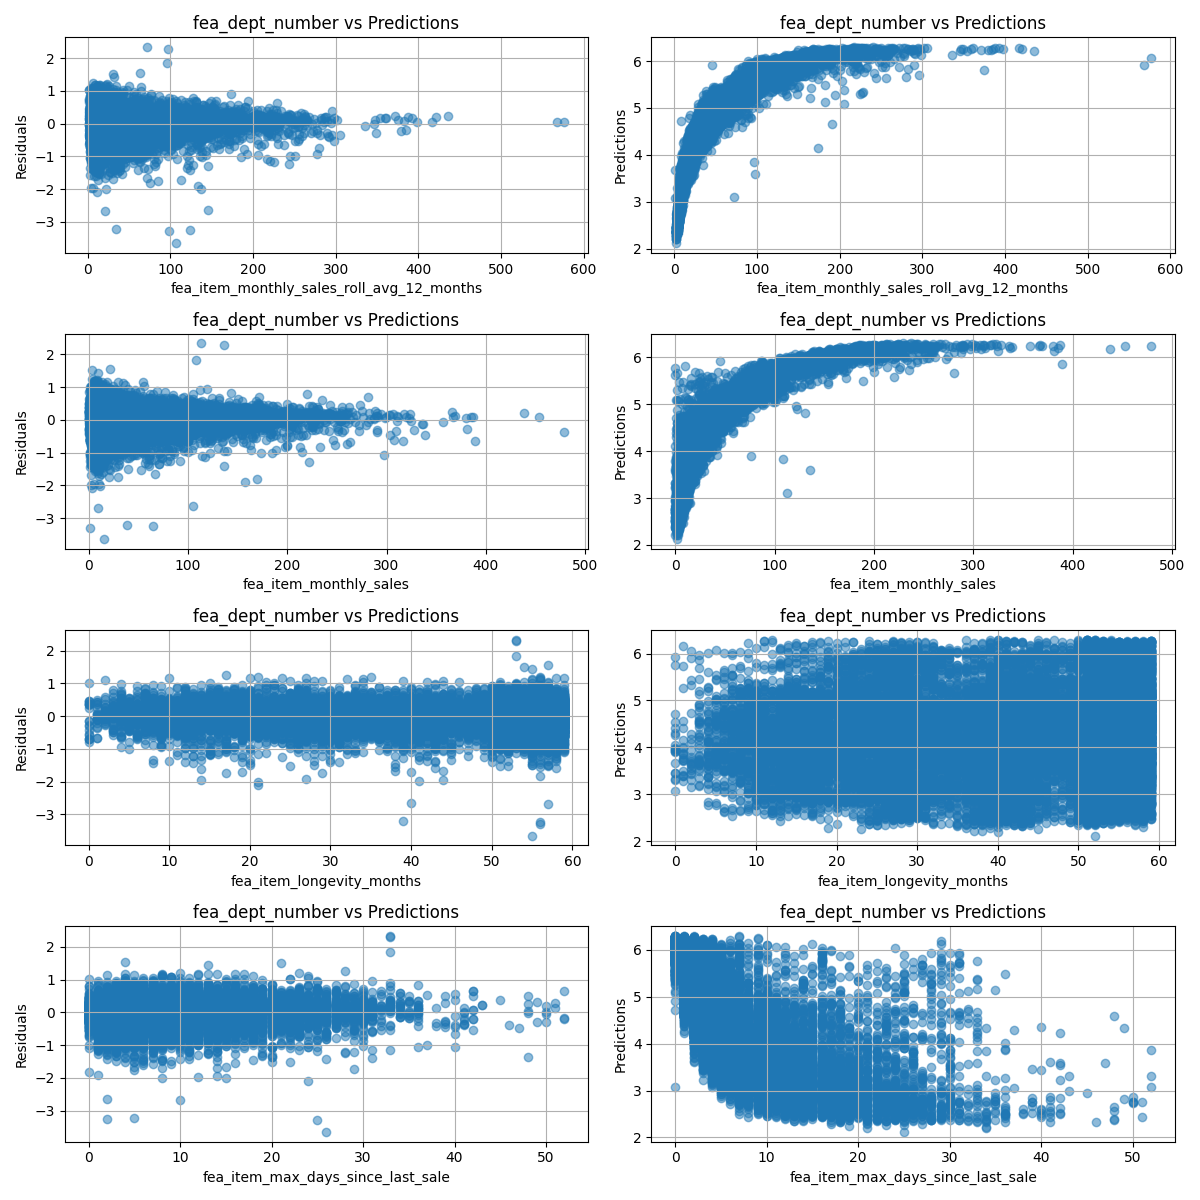

In [22]:
from IPython.display import Image, display
display(Image(trained_model._plot_importance_path))

# Compare Transformed Results

In [27]:
from src.core.models.xgboost import XgboostModel

def load(cls, model_path):
    with open(model_path, "rb") as f:
        return pickle.load(f)
    
model = XgboostModel().load_model(
    '/Users/anapreciado/Desktop/porygon-demand-forecasting/src/artifacts/models/xgboost/20260126_135619/model_0.pickle'
)

INFO:src.core.models.xgboost:Model loaded from /Users/anapreciado/Desktop/porygon-demand-forecasting/src/artifacts/models/xgboost/20260126_135619/model_0.pickle


In [35]:
model.model.evals_result()

{'validation_0': OrderedDict([('rmse',
               [0.7353778497660748,
                0.5740849628607014,
                0.4733073463761115,
                0.413107389165804,
                0.3785341754909708,
                0.35901783017961636,
                0.347576588666618,
                0.34051669092946285,
                0.33594083081839077,
                0.3330628107361208,
                0.3305839387791115,
                0.32875137536771587,
                0.32728312817854094,
                0.32596513596961696,
                0.32479569772460226,
                0.32374017904323604,
                0.3225212671291267,
                0.3214200739990295,
                0.3203501728244072,
                0.31976973689384586,
                0.3185462742189504,
                0.3174888391473988,
                0.31695633115758526,
                0.3159848797400579,
                0.3152620003924401,
                0.31468551034275766,
                

In [24]:
type(model)

src.core.models.xgboost.XgboostModel

In [25]:
model.validation_df

,tgt_monthly_sales_sum_3_next_months,ctx_date_month,tgt_benchmark,ctx_state_id,ctx_store_id,ctx_cat_id,ctx_dept_id,ctx_item_id,fea_is_foods,fea_is_hobbies,...,fea_sum_cat_monthly_sales_roll_std_12_months,fea_sum_cat_monthly_sales_roll_min_12_months,fea_sum_cat_monthly_sales_roll_max_12_months,fea_sum_cat_monthly_sales_roll_count_12_months,fea_item_monthly_sales_ratio_lag_1_months,fea_item_monthly_sales_ratio_lag_2_months,fea_item_monthly_sales_ratio_lag_11_months,fea_item_monthly_sales_roll_coeffvar_3_months,fea_item_monthly_sales_roll_coeffvar_6_months,fea_item_monthly_sales_roll_coeffvar_12_months
36831,2.944439,2015-12-01,4.330733,CA,CA_1,HOBBIES,HOBBIES_2,HOBBIES_2_113,0,1,...,1127.478592,14185,17573,13,1.666667,3.125000,6.250000,1.656306,1.685924,1.119193
36832,4.077537,2015-12-01,3.89182,CA,CA_1,HOBBIES,HOBBIES_2,HOBBIES_2_132,0,1,...,643.192869,15800,17573,6,0.551724,0.592593,NaN,2.831236,2.597598,2.597598
36833,3.295837,2015-12-01,3.7612,CA,CA_1,HOBBIES,HOBBIES_2,HOBBIES_2_121,0,1,...,1127.478592,14185,17573,13,0.451613,0.777778,0.636364,2.004204,1.612937,2.139222
36834,1.94591,2015-12-01,1.386294,CA,CA_1,HOBBIES,HOBBIES_2,HOBBIES_2_037,0,1,...,1127.478592,14185,17573,13,1.000000,0.250000,0.200000,1.500000,1.312323,1.478777
36835,3.663562,2015-12-01,3.526361,CA,CA_1,HOBBIES,HOBBIES_2,HOBBIES_2_011,0,1,...,1127.478592,14185,17573,13,1.100000,0.846154,0.785714,2.993846,1.626744,2.253203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110987,3.332205,2015-07-01,3.091042,CA,CA_1,FOODS,FOODS_3,FOODS_3_145,1,0,...,5901.982896,67980,90489,13,0.875000,1.000000,0.368421,14.500000,2.286386,2.569110
110988,5.192957,2015-07-01,6.021023,CA,CA_1,FOODS,FOODS_3,FOODS_3_224,1,0,...,5901.982896,67980,90489,13,1.212389,10.538462,2.322034,1.408254,1.392478,1.987505
110989,4.532599,2015-07-01,4.204693,CA,CA_1,FOODS,FOODS_3,FOODS_3_298,1,0,...,5901.982896,67980,90489,13,0.578947,0.423077,0.785714,2.436874,2.126657,2.820502
110990,4.727388,2015-07-01,4.890349,CA,CA_1,FOODS,FOODS_3,FOODS_3_787,1,0,...,5901.982896,67980,90489,13,1.100000,0.758621,0.619718,1.617215,2.391744,2.465993


In [26]:
model.model_name

'xgboost'